<a href="https://colab.research.google.com/github/ebatty/IntroCompNeuro/blob/main/Notes/Decoding_LogisticRegression.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

# Decoding: Logistic Regression
**Learning objectives of notes**:
After these notes, students should be able to:
- Describe difference between regression and classification
- Describe math behind logistic regression




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

# Section 1: Regression vs classification

In the last section, we talked about trying to decode speed as a weighted sum of the neural activity, aka by using linear regression. Speed is a continuous-valued variable - it can take on any number. What if we were trying instead to decode the decision of a mouse, whether it turned left or right? 

 We can encode a left turn as 0 and a right turn as 1. However, linear regression is no longer a great choice of model here. We have two discrete choices, 0 vs 1, to predict so we should incorporate that into the model. Indeed, this is an example of classification.

If we are trying to predict a continuously valued output, such as speed, we use **regression models**. If we are trying to predict the output as one of a set of classes or categories (such as left vs right), we use **classification models**.

In these notes, we'll outline one classification model, which is extremely confusingly named **logistic regression**. It is not a regression model, so this name is very silly.

# Section 2: Logistic Regression

We will outline logistic regression by going through the steps of model fitting we outlined in the previous notes.

## Step 1: Define a mapping (model) from input to output

Let's say we have the activities of 3 neurons and we're trying to decode the decision of the mouse (left turn vs right turn):

\begin{align}
y&: \text{decision, 0 if left turn, 1 if right}\\
n_1, n_2, n_3 &: \text{firing rates of neuron 1, neuron 2, neuron 3}\\
\end{align}

We actually are going to use a model quite similar to linear regression but with an extra cherry on top that accounts for this being a classification problem instead of a regression problem.

The first step of our model will be identical to linear regression: we will compute an intermediate value z as the weighted sum of neural activity:

\begin{align}
z &= w_0 + w_1n_1 + w_2n_2 + w_3n_3 = \vec{w}\cdot\vec{n}\\
\end{align}

Next, we'll put z through a "squishing function". We want to get to the probability that the mouse turned left vs right. Probabilities have to be between 0 and 1, so we'll put through z through the sigmoid function, which ensures that the output is between 0 and 1.

\begin{align}
z &= w_0 + w_1n_1 + w_2n_2 + w_3n_3\\
p &= \frac{1}{1+exp(-z)}
\end{align}

Here is a plot of the sigmoid function to help visualize this squishing:



[Text(0, 0.5, 'p'), Text(0.5, 0, 'z')]

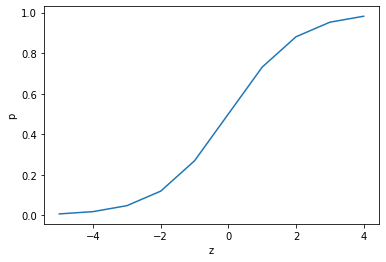

In [ ]:
z = np.arange(-5, 5)
p = 1/(1+np.exp(-z))

fig, ax = plt.subplots()
ax.plot(z, p)
ax.set(xlabel='z',
       ylabel='p')

Now we have $p$, which is the probability that the mouse choise to turn right, the probability that y=1.

We can predict which decision the mouse made based on $p$. If $p>=.5$, we predict that the mouse turned right. If $p<.5$, we predict that the mouse turned left.

We now have a full model defined that goes from the inputs to a prediction for the output (decision):

\begin{align}
z &= w_0 + w_1n_1 + w_2n_2 + w_3n_3\\
p &= \frac{1}{1+exp(-z)}\\
\hat{y} &=       \begin{cases}
      0 & \text{if $p<0.5$}\\
      1 & \text{if $p>=0.5$}\\
    \end{cases} 
\end{align}


## Step 2: Collect data: measurements of input/output pairs

We record the mouse's decision on many trials, and the neural activity at the time of the decision. Each trial is a data point (input/output pair)

## Step 3: Decide on loss function

We now have our model and the data we want to use to fit it. We need a quantitative measure of how badly our model is doing, our **cost function**, or **loss function**.

Given $p$, the probability that y=1 is p. The only other option for y is $y=0$, so we know the probability of $y=0$ has to be $1-p$ (since probabilities of all options have to add up to 1). We can rewrite this handily as:

$$Prob(y) = p^y(1-p)^{1-y} $$

where 
\begin{align}
z &= w_0 + w_1n_1 + w_2n_2 + w_3n_3\\
p &= \frac{1}{1+exp(-z)}\\
\end{align}

Think through what the above equation equals for $y=0$ and $y=1$ - you'll see that it's equivalent to what I wrote out above! 

This is the binomial distribution, it's most known for determining the probability of seeing heads or tails on a coin flip,. In that scenario, p tells us the bias of a coin. It would be 0.5 for most fair coins (equal likelihoods of seeing heads vs tails) but could be different for a biased coin used by a magician for example.

We now have an equation for the probability of seeing our data given our model (since p is given by the model). We want to find the values for the weights that **maximize** the probability of seeing our data! 

First though, we need to change this so that we are accounting for more than one data point. Remember we have data from multiple trials. We want to fit our model to maximize the probability of seeing our data given our model *across all trials*. Remember that you can multiply together probabilities of independent events. So for example, to get the probability of seeing 3 heads in a row on a toin coss, you would multiple together the probability of seeing a head 3 times. p(HHH) = p(H)*p(H)*p(H) = 0.5 * 0.5 * 0.5.

Using the same logic, the probability of seeing all our data across trials equals the probability of seeing the data on each trials multiplied together. Let's say we have trials i=1 to i=N. The decision on trial i is $y_i$ and the neural activity of neuron 1 on trial i is $n_{1, i}$, of neuron 2 is $n_{2, i}$ and so on.

\begin{align}
Prob(y_1, y_2, ..., y_N) &= \prod_{i=1}^N Prob(y_i)\\&= \prod_{i=1}^N p_i^{y_i}(1-p_i)^{1-y_i} 
\end{align}

where 
\begin{align}
z_i &= w_0 + w_1n_{1, i} + w_2n_{2, i} + w_3n_{3, i}\\
p_i &= \frac{1}{1+exp(-z_i)}\\
\end{align}

We want to find the values of the weights that maximizes this overall probability to fit our model. Since we usually try to minimize things, we can just make this negative: we want to minimize the negative probability of seeing our data given the model

## Step 4: Learn model parameters from data

We won't dive into exactly how we find these weights, we have handy code that does it for us. `sklearn` has a `LogisticRegression` class that will fit our model for us (you'll explore this in homework 1).

## Step 5: Evaluate performance on held-out data

Once we have fit our model, we can evaluate our model on held-out data. We can report the accuracy of our model: the percentage of the time that we predicted the right category. 

**Note we didn't explicitly fit our model to maximize accuracy, because this doesn't work well for reasons we don't go into. However, it's a nice interpretable measure of how our model performs that we can still report!**

```{admonition} **Stop and think!** Let's say the true decisions on 6 trials were $y=[0, 1, 1, 0, 0, 1]$. Using your learned logistic regression model, your predictions are $\hat{y} = [1, 0, 1, 0, 0, 1]$. What is the accuracy of your model?
:class: tip, dropdown
We were incorrect in our predictions on two of the trials (the first two) and correct on four (the last four). So our accuracy is 4/6, or 66%.

```{admonition} **Stop and think!** What is the chance accuracy in the above example? Let's say the training data contained 40% left turn decisions (y=0) and 60% right turn decisions (y=1).
:class: tip, dropdown
If the neurons didn't contain any information about decisions, we'd be best off just guessing the most common decision in the training data as our prediction for all test trials. In this case, we'd guess right turn decisions, which would make our accuracy on the test data 50%. So our baseline/chance test accuracy would be 50%

# Section 3: Multinomial logistic regression

Instead of two categories (left vs right decision), let's say we're trying to predict which of 6 categories occured. For example, the mouse is now choosing 1 of 6 directions to go in (hallways branching off of the central point where the mouse is located). We want to predict which hallway they went down from neural activity.



We'll have weights from the neurons to predict the probability of each class (hallway) separately. 

We can drop the sigmoid function and replace with an exponential function. The reason we can do this is that we want to constrain the outputs to be positive, but we don't need to constain to between 0 and 1 using the sigmoid. Instead, we'll normalize all the exponentiated dot products over all the hallways to compute the probability of each hallway (so they all sum to 1):


\begin{align}
z_h &= \vec{w}_h\cdot\vec{n}_i\\
\end{align}

Compute the above for all 6 values of h (the six hallways). Then normalize by the sum so all 6 probabilities sum to 1:

\begin{align}
Prob(h) &= \frac{e^{z_h}}{\sum_{j=1}^{6} e^{z_j} }\\
\end{align}

This gives us 6 values: the probabilities that mouse chose each of the 6 hallways. Our prediction can be the hallway with the highest probability. As in the two class logistic regression case, we will learn the weights to maximize the probability of seeing our data given the model/weights (not derived here)


```{admonition} **Stop and think!** Let's say we have two neurons and are decoding which hallway the mouse took of 3. The neural activity vector is [1, $n_1$, $n_2$]. You fit the multinomial model and find that $w_{h=1}$ = [1, -1, 5], $w_{h=2}$ = [0, 1, 4], and $w_{h=3}$ = [-2, -1, 0]. For a trial where neuron 1 has activity of 4 and neuron 2 has activity of 1, what hallway would you predict the mouse took?
:class: tip, dropdown

\begin{align}
z_{h=1} &= [1, -1, 5]\cdot[1, 4, 1] = 2\\
z_{h=2} &= [0, 1, 4]\cdot[1, 4, 1] = 8\\
z_{h=3} &= [-2, -1, 0]\cdot[1, 4, 1] = -6\\
\end{align}

Now we normalize:

\begin{align}
Prob(h=1) &= \frac{e^{z_{h=1}}}{\sum_{j=1}^{3} e^{z_{h=j}}} = \frac{e^2}{e^2 + e^8 + e^{-6}} = 0.0025\\
Prob(h=2) &= \frac{e^{z_{h=2}}}{\sum_{j=1}^{3} e^{z_{h=j}}} = 0.9975\\
Prob(h=3) &= \frac{e^{z_{h=-6}}}{\sum_{j=1}^{3} e^{z_{h=j}}} = 0\\
\end{align}

Note these three probabilities now add up to 0, as they should! It is clear that we would predict the mouse took the second hallway, since the probability of the mouse taking that hallway given the model and neural activity is extremely high.

```{admonition} **Stop and think!** If you have 7 neurons and are decoding which hallway the mouse took out of 8 hallways, how many weights will you learn?
:class: tip, dropdown
You'll learn a weight from each neuron for each hallway: 7 neurons * 8 hallways = 56 weights.